## Analyse en composante principale

In [37]:

def create_gaussianData():    
    nbData=400
    
    cov01=5
    cov02=-1
    
    sigma2=np.array([
        [20,    cov01,  cov02],
        [cov01, 2,      0],
        [cov02, 0,      0.1]
    ])
    
    """peut-on choisir n'importe quelles valeurs pour cov01 et cov02 ?"""
    
    U,S2,U_T = np.linalg.svd(sigma2)
    
    S_diag=np.diag(np.sqrt(S2))
    
    sigma=U.dot(S_diag).dot(U_T)
    
    return np.random.normal(size=[nbData,3])@sigma+np.array([5,10,-3])


X=create_gaussianData()
""" A la la shape habituelle d'une dataFrame : les individus sont les lignes, les variables les colonnes. """
print("X.shape",X.shape)

X.shape (400, 3)


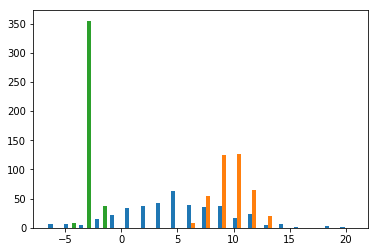

In [3]:
plt.hist(X,bins=20)
plt.show()

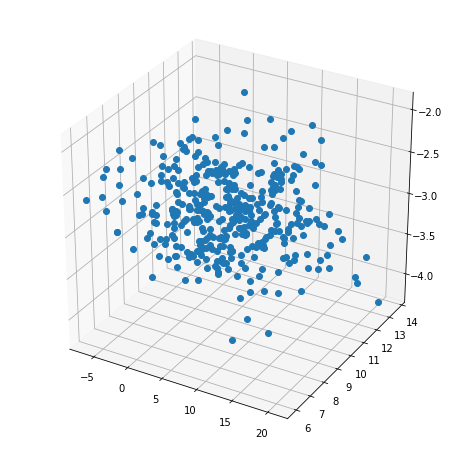

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,0],X[:,1],X[:,2],'o');


observons les va 2 à 2

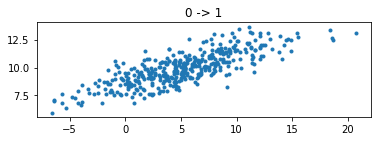

In [5]:
plt.plot(X[:,0],X[:,1],'.')
plt.gca().set_aspect('equal')
plt.title("0 -> 1");

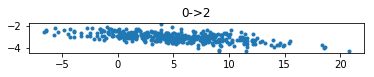

In [6]:
plt.plot(X[:, 0], X[:, 2],'.')
plt.gca().set_aspect('equal')
plt.title("0->2");

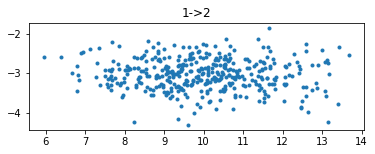

In [7]:
plt.plot(X[:, 1], X[:, 2],'.')
plt.gca().set_aspect('equal', adjustable='box')
plt.title("1->2");

estimons la matrice de covariance

covariance à la main:
 [[20.81  5.39 -1.05]
 [ 5.39  2.18 -0.04]
 [-1.05 -0.04  0.15]]
covariance déjà faites, mais numpy voit les dataFrame dans l'autre sens
 [[20.86  5.4  -1.05]
 [ 5.4   2.18 -0.04]
 [-1.05 -0.04  0.16]]


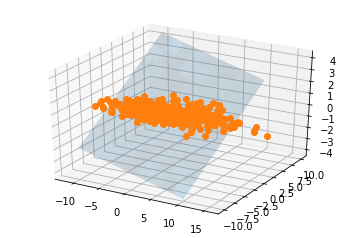

In [11]:
U, S, V = np.linalg.svd(cov)

bary=X.mean(axis=0)

"""traçons le plan affine passant par bary, et orthogonal au 3 ième vecteur propre (donc étant dans la direction des deux premiers)"""
normal=U[:,2]

"""
l'équation du plan est
    ax+by+cz+d=0
avec
    [a,b,c]=normal
et le plan doit passer par bary
donc
    d= - dot(normal,bary)
"""

d=np.dot(normal,bary)

# create x,y
xx, yy = np.meshgrid(np.linspace(-10,10,10),np.linspace(-10,10,10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]


# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111, projection='3d')

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.2)

# and plot the point
ax.plot(X[:, 0], X[:, 1], X[:, 2], 'o');

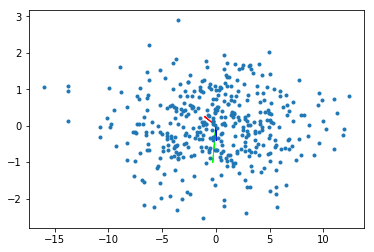

In [13]:
U2=U[:,:2]

X_proj=np.dot(X,U2)

axis=np.diag([1,1,1])
axis_proj=np.dot(axis,U2)

plt.plot(X_proj[:,0],X_proj[:,1],'.')

colors=np.diag([1,1,1])

for i in range(3):
    plt.arrow(0, 0, axis_proj[i,0], axis_proj[i,1], head_width=0.05, head_length=0.1,label='toto',color=colors[i,:])

## indices de masse corporels

In [22]:
def makeData():
    nbData=200

    """ des poids d'adultes, entre 50 et 100 kilos """
    poids=np.random.beta(2,5,size=nbData)*100 +30

    """ des IMC (indices de masses corporelles), """
    IMC = np.random.beta(1,5,size=nbData)*25+16

    """ des tailles, que l'on construit à partir des poids et de l'ICM"""
    taille=np.sqrt(poids/IMC)-0.1

    """ mesure du tour de tête """
    tete=np.random.beta(3,1)*10+2*IMC

    X=np.stack([poids,taille,tete],axis=1)

    Y=(IMC>25).astype(np.int32)

    return X,Y


X,Y=makeData()
print("X.shape:",X.shape)
print("Y.shape:",Y.shape)
print("X[:4]: \n",X[:4])
print("Y[:10]: ",Y[:10])


X.shape: (200, 3)
Y.shape: (200,)
X[:4]: 
 [[72.8   2.   39.58]
 [66.52  1.56 55.07]
 [40.72  1.05 67.97]
 [57.2   1.71 41.49]]
Y[:10]:  [0 0 1 0 0 0 0 0 0 1]


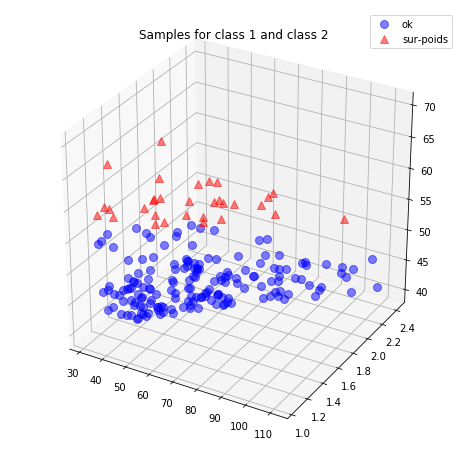

In [23]:
class0=X[Y==0]
class1=X[Y==1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class0[:,0], class0[:,1], class0[:,2], 'o', markersize=8, alpha=0.5, color='blue',label='ok')
ax.plot(class1[:,0], class1[:,1], class1[:,2], '^', markersize=8, alpha=0.5, color='red' ,label='sur-poids')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')
    

A vous : projetez les donnée sur le plan de plus grande variance.
Faut-il centrer-réduire les données dans ce cas là ?

## Vraie données

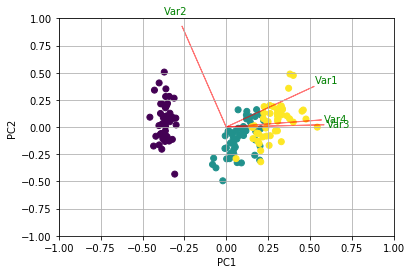

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))


## Exemple en grande dimension

(1797, 64)
(1797, 64)
(1797, 2)


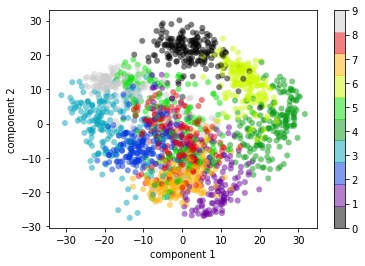

In [25]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)


pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();